# Pneumonia recognition using X-Ray report images

## Architecture of a network 

![](https://images.squarespace-cdn.com/content/v1/5ccb715016b640627a1c2782/1586907440135-6INS2V3VS31ICY3TNUIW/ai-artificial-neural-network-alex-castrounis.png)

## Working of a neuron

![](https://miro.medium.com/max/1400/1*Bo2gNRKR3wDHzFsseDvMeg.png)

![](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.53.07-PM.png)

In [ ]:
!pip install gdown

In [ ]:
!gdown https://drive.google.com/uc?id=1Wrttum6UsSuauacS0fLmnWjr8E-_rae6

Downloading...
From: https://drive.google.com/uc?id=1Wrttum6UsSuauacS0fLmnWjr8E-_rae6
To: /content/chest-xray-pneumonia.zip
2.46GB [00:28, 85.2MB/s]


In [ ]:
!unzip -qq chest-xray-pneumonia.zip

In [ ]:
train_folder= './chest_xray/chest_xray/train/'
val_folder = './chest_xray/chest_xray/val/'
test_folder = './chest_xray/chest_xray/test/'

In [ ]:
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

# What we see vs What computer sees

![Image as an Array](https://cdn-images-1.medium.com/max/1600/1*cot55wd6gdoJlovlCw0AAQ.png)

1342
normal picture title:  NORMAL2-IM-1167-0001.jpeg
pneumonia picture title: person701_virus_1297.jpeg


Text(0.5, 1.0, 'Pneumonia')

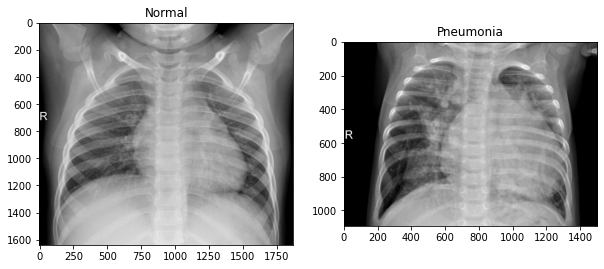

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = cv2.imread(norm_pic_address)
sic_load = cv2.imread(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load, cmap="gray")
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load, cmap="gray")
a2.set_title('Pneumonia')

In [ ]:
print("Shape : ", norm_load.shape)

for ind, i in enumerate(norm_load[0][:10]) :
  print(f"Pixel [0][{ind}]  : {i} ")

Shape :  (1638, 1870, 3)
Pixel [0][0]  : [77 77 77] 
Pixel [0][1]  : [79 79 79] 
Pixel [0][2]  : [76 76 76] 
Pixel [0][3]  : [77 77 77] 
Pixel [0][4]  : [78 78 78] 
Pixel [0][5]  : [78 78 78] 
Pixel [0][6]  : [80 80 80] 
Pixel [0][7]  : [77 77 77] 
Pixel [0][8]  : [79 79 79] 
Pixel [0][9]  : [79 79 79] 


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

# Convolutional Neural Network

## Working

![](https://cdn-images-1.medium.com/max/800/1*VVvdh-BUKFh2pwDD0kPeRA@2x.gif)

## Application on an image

![](https://cdn-images-1.medium.com/max/800/1*EuSjHyyDRPAQUdKCKLTgIQ.png)

In [ ]:
cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

## Max Pooling
![](https://cdn-images-1.medium.com/max/800/1*vbfPq-HvBCkAcZhiSTZybg.png)

In [ ]:
#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

## Flattening

![](https://miro.medium.com/max/1400/1*IWUxuBpqn2VuV-7Ubr01ng.png)

In [ ]:
# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [ ]:
num_of_test_samples = 600
batch_size = 32

## Image Data Generator

![](https://studymachinelearning.com/wp-content/uploads/2019/10/dir_str_for_flow_from_dir.jpeg)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory(train_folder,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(val_folder,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Training

![](https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif)

In [ ]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 50,
                         validation_data = validation_generator,
                         validation_steps = 624)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
163/163 [==============================] - 89s 351ms/step - loss: 0.3720 - accuracy: 0.8386 - val_loss: 0.3298 - val_accuracy: 0.9375
Epoch 2/50
163/163 [==============================] - 57s 349ms/step - loss: 0.2302 - accuracy: 0.9043
Epoch 3/50
163/163 [==============================] - 57s 350ms/step - loss: 0.2068 - accuracy: 0.9164
Epoch 4/50
163/163 [==============================] - 57s 351ms/step - loss: 0.1931 - accuracy: 0.9254
Epoch 5/50
163/163 [==============================] - 57s 351ms/step - loss: 0.1798 - accuracy: 0.9268
Epoch 6/50
163/163 [==============================] - 58s 353ms/step - loss: 0.1592 - accuracy: 0.9371
Epoch 7/50
163/163 [==============================] - 58s 355ms/step - loss: 0.1559 - accuracy: 0.9417
Epoch 8/50
163/163 [==============================] - 58s 356ms/step - loss: 0.1554 - accuracy: 0.9398
Epoch 9/50
163/163 [==============================] - 58s 356ms/step - loss: 0.1449 - accuracy: 0.9463
Epoch 10/50
163/163 [==========

In [ ]:
cnn.predict()